In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

In [61]:
## Clustering around KM per liter VS Horsepower
import Cleaner as cl
dataset = cl.get_and_clean_df('../data/bilhandel_unclean.csv')
dataset = dataset[dataset['Make'] == 'Mazda']
display(dataset)
features = dataset[['Km/l','Hestekræfter']]

,Make,Brændstoftype,Gearkasse,Model,Kilometer,Årgang,Hestekræfter,Antal døre,Antal gear,Km/l,0 - 100 km/t,Tophastighed,Vægt,Grøn Ejerafgift,Nypris,Pris
197,Mazda,Benzin,Automatisk,CX-3,85000,2016,120,5,6,17.2,9.9,187.0,1.198,1.88,290998.0,179500
280,Mazda,Benzin,Manuel,3,339000,2009,105,5,5,15.9,12.2,184.0,1.155,2.52,218049.0,24900
297,Mazda,Benzin,Manuel,3,37000,2014,165,5,6,17.2,8.2,210.0,1.295,1.88,266997.0,149700
334,Mazda,Benzin,Automatisk,CX-5,9000,2020,165,5,6,16.7,9.8,192.0,1.484,2.38,435918.0,399700
381,Mazda,Benzin,Manuel,5,140000,2010,146,5,6,12.7,10.2,194.0,1.485,4.36,312990.0,79900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19595,Mazda,Benzin,Automatisk,2,28000,2015,90,5,6,20.8,12.0,177.0,975.000,660.00,175620.0,149900
19682,Mazda,Benzin,Manuel,3,116000,2013,165,5,6,17.2,8.2,210.0,1.295,1.88,293392.0,125000
19841,Mazda,Benzin,Manuel,3,145000,2011,105,4,5,15.4,12.2,184.0,1.155,2.52,224999.0,59900
19861,Mazda,Benzin,Manuel,6,78000,2002,141,5,5,11.8,9.9,206.0,1.300,4.96,281989.0,29900


In [62]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(features)
centroids = kmeans.cluster_centers_

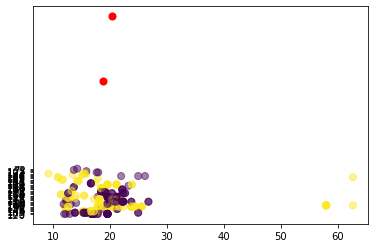

In [63]:
# Plot our data about the cars (KmPerLiter VS Hestekræfter) and the centroids we have found for the clusters
plt.scatter(dataset['Km/l'], dataset['Hestekræfter'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

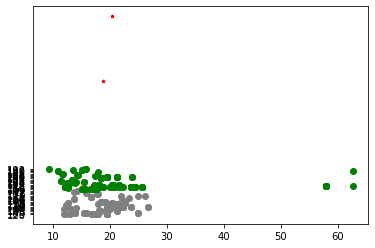

In [64]:
prediction = kmeans.predict(features)
dataset['cluster'] = prediction
cluster_one = dataset[dataset['cluster'] == 0][['Km/l','Hestekræfter']]
cluster_two = dataset[dataset['cluster'] == 1][['Km/l','Hestekræfter']]
cluster_three = dataset[dataset['cluster'] == 2][['Km/l','Hestekræfter']]
cluster_four = dataset[dataset['cluster'] == 3][['Km/l','Hestekræfter']]
cluster_five = dataset[dataset['cluster'] == 4][['Km/l','Hestekræfter']]
cluster_six = dataset[dataset['cluster'] == 5][['Km/l','Hestekræfter']]

plt.scatter(cluster_one['Km/l'], cluster_one['Hestekræfter'], c="grey")
plt.scatter(cluster_two['Km/l'], cluster_two['Hestekræfter'], c="green")
plt.scatter(cluster_three['Km/l'], cluster_three['Hestekræfter'], c="blue")
plt.scatter(cluster_four['Km/l'], cluster_four['Hestekræfter'], c="yellow")
plt.scatter(cluster_five['Km/l'], cluster_five['Hestekræfter'], c="pink")
plt.scatter(cluster_six['Km/l'], cluster_six['Hestekræfter'], c="cyan")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10, marker='*')

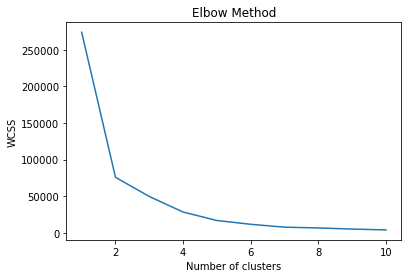

In [65]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1], dtype=int32)

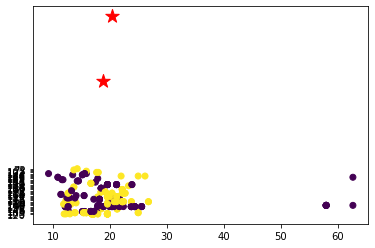

In [66]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features)
display(pred_y)
plt.scatter(features['Km/l'], features['Hestekræfter'], c=kmeans.labels_.astype('float'))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*')